![MLA Logo](https://drive.corp.amazon.com/view/mrruckma@/MLA_headerv2.png?download=true)

### BALANCING DATASET
### 1-UPSAMPLING THE SMALL CLASSES
#### Let's balance our sample dataset. We will upsample the small classes so that they all match the size of the largest class

In [1]:
import pandas as pd
df = pd.read_pickle("/tmp/example_dataset.pkl")
print(df.head())

     ID                                               data  class
0  1417  [[[255, 255, 255], [255, 255, 255], [255, 255,...      3
1   146  [[[255, 255, 255], [255, 255, 255], [255, 255,...      4
2  2162  [[[239, 239, 239], [245, 245, 245], [248, 248,...      3
3   261  [[[255, 255, 255], [255, 255, 255], [255, 255,...      3
4  1243  [[[255, 255, 255], [255, 255, 255], [255, 255,...      4


#### Let's plot our dataset below.
Class 3 is the dominant class. We will upsample all other data points.

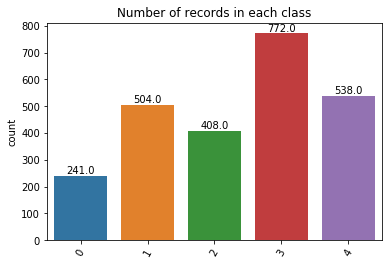

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df["class"].values, y = None)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(), y), ha='center', va='bottom') 
plt.xticks(rotation=60)
plt.title('Number of records in each class')
plt.show()

Let's get all records grouped by their classses

In [7]:
class_0 = df.loc[df['class'] == 0]
class_1 = df.loc[df['class'] == 1]
class_2 = df.loc[df['class'] == 2]
class_3 = df.loc[df['class'] == 3]
class_4 = df.loc[df['class'] == 4]

We will make use sklearn library to upsample small classes and shuffle the whole data frame at the end.

In [8]:
from sklearn.utils import resample
from sklearn.utils import shuffle

upsampled_class_0 = resample(class_0, 
                             replace=True, # sample with replacement
                             n_samples=len(class_3), # upsample to match class 3
                             random_state=123 # reproducible result
                            )
upsampled_class_1 = resample(class_1, 
                             replace=True, # sample with replacement
                             n_samples=len(class_3), # upsample to match class 3
                             random_state=123 # reproducible result
                            )
upsampled_class_2 = resample(class_2, 
                             replace=True, # sample with replacement
                             n_samples=len(class_3), # upsample to match class 3
                             random_state=123 # reproducible result
                            )
upsampled_class_4 = resample(class_4, 
                             replace=True, # sample with replacement
                             n_samples=len(class_3), # upsample to match class 3
                             random_state=123 # reproducible result
                            )

df_upsampled = pd.concat([upsampled_class_0, 
                          upsampled_class_1,
                          upsampled_class_2,
                          class_3,
                          upsampled_class_4,
                         ])

# We put all records in order by their class, let's shuffle everything
df_upsampled = shuffle(df_upsampled)

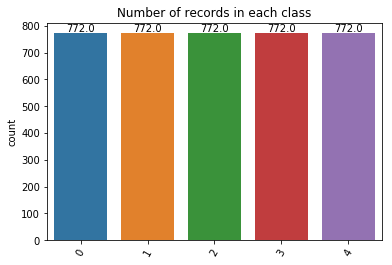

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df_upsampled["class"].values, y = None)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(), y), ha='center', va='bottom') 
plt.xticks(rotation=60)
plt.title('Number of records in each class')
plt.show()

### 2-DATA AUGMENTATION (CREATE NEW SIMILAR DATA POINTS)

We will make use of some simple sklearn and numpy functions to create slightly changed images.
#### __1-Rotate image:__ This will rotate the image for a given number of angle. 
#### __2-Random noise:__ This adds random noise to image
#### __3-Flip image:__ We can flip the image horizontally or vertically

In [ ]:
import random
import skimage as sk
from skimage import transform
from skimage import util
import numpy as np

# Rotate the image with a given angle
def rotate_image(image_array, angle):
    # Rotate the image by the given angle 
    # We usually have white background in images, 
    # we will fill 1s (white) for the areas outside of image boundaries
    return sk.transform.rotate(image_array, angle, cval=1)

# Add random noise to image
def random_noise(image_array):
    # add random noise to the image
    return sk.util.random_noise(image_array)
    
# Flip the image at a given axis
def image_flip(image_array, axis):
    # axis=0 => vertical flip
    # axis=1 => horizontal flip
    return np.flip(image_array, axis=axis)

In [ ]:
import matplotlib.pyplot as plt

image = df['data'][25]
plt.imshow(image)

#### __1-Rotate image:__

In [ ]:
# Rotate by 30 degrees
plt.imshow(rotate_image(image, 30))

In [ ]:
# Rotate by -30 degrees
plt.imshow(rotate_image(image, -30))

#### __2-Random Noise:__

In [ ]:
# Add random noise to image
plt.imshow(random_noise(image))

#### __3-Flip the image:__

In [ ]:
# Flip the image vertically
plt.imshow(image_flip(image, 0))

In [ ]:
# Flip the image vertically
plt.imshow(image_flip(image, 1))